In [66]:
# tutorial - https://colab.research.google.com/drive/1zjMHPv3H7mV5iLWapiW9IF2yUoY2Jggg#scrollTo=nAl0C2yPFita

import matplotlib

# requests for fetching html of website
import requests

# make the request to a url
r = requests.get('http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html')

# create soup from content of request
c = r.content

from bs4 import BeautifulSoup

soup = BeautifulSoup(c)

C:\Users\e5553468\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\e5553468\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [9]:
# We can find an element on the page by inspecting the page (right click and hit inspect element). 
# We then use a series of HTML selectors to find the appropriate tags which contain the content we are interested in. 
# The next code block finds the main text of the entire article. 
# We will then further subset the text to the relevant table and save it as a text object.

In [10]:
# find the element on the webpage page
main_content = soup.find('div', attrs = {'class': 'entry-content'})
main_content

<div class="entry-content" id="entryContent">
<p>CLEVELAND, Ohio - <a href="http://www.case.edu/">Case Western Reserve University </a>President Barbara Snyder's $700,312 base pay and $175,000 bonus in 2015 again made her the highest paid private college leader in Ohio, according to an annual report.</p>
<p>Nationally, Snyder's total compensation of $1.154 million, which can include deferred compensation and other pay, ranked 41st out of 541 presidents of private colleges according to the report by the <a href="http://chronicle.com/">Chronicle of Higher Education.</a></p>
<p>She is among 58 presidents to earn $1 million or more. The previous year, 39 private college presidents earned more than $1 million.</p>
<p>The Chronicle's <a href="https://www.chronicle.com/interactives/executive-compensation#id=table_private_2015">compensation tables </a>come from a review of federal tax documents from the 2015 calendar year, the most recent available. </p>
<p>Former University of Dayton President

In [11]:
# extract the relevant information
content = main_content.find('ul').text

import pprint
pprint.pprint(content)

('\n'
 'Grant Cornwell, College of Wooster (left in 2015): $911,651\n'
 'Marvin Krislov, Oberlin College (left in 2016): \xa0$829,913\n'
 'Mark Roosevelt, Antioch College, (left in 2015): $507,672\n'
 'Laurie Joyner, Wittenberg University (left in 2015): $463,504\n'
 'Richard Giese, University of Mount Union (left in 2015): $453,800\n'
 'Sean Decatur,Kenyon College: $451,698\n'
 'Adam Weinberg, Denison University: $435,322\n'
 'Daniel Dibiasio, Ohio Northern University: $414,716\n'
 'Denvy Bowman, Capital University (left in 2016): $388,570\n'
 'Anne Steele, Muskingum University (left in 2016): $384,233\n'
 'Kathy Krendl, Otterbein University: \xa0$378,035\n'
 'Rockwell Jones, Ohio Wesleyan University: $366,625\n'
 'Robert Helmer, Baldwin Wallace University: $365,616\n'
 'Robert Huntington, Heidelberg University: $300,005\n'
 'Lori Varlotta, Hiram College: $293,336\n'
 'Joseph Bruno, Marietta College (left in 2016): $288,295\n'
 'W. Richard Merriman Jr., University of Mount Union (star

In [ ]:
# first we want to extract the names of the presidents.
# we do this taking advantage of the fact that the names come at the beginning of each new line
# we therefore use an expression in the multiline mode
# which treats eevery new line character as the end of the string
# so the next character in the start of a string
# the names also all end with a comma, so we can use this to bound the names.

In [15]:
#NAMES

import re

# create a pattern to match names
name_pattern = re.compile(r'^([A-Z]{1}.+?)(?:,)', flags = re.M)
name_pattern.findall(content)

['Grant Cornwell',
 'Marvin Krislov',
 'Mark Roosevelt',
 'Laurie Joyner',
 'Richard Giese',
 'Sean Decatur',
 'Adam Weinberg',
 'Daniel Dibiasio',
 'Denvy Bowman',
 'Anne Steele',
 'Kathy Krendl',
 'Rockwell Jones',
 'Robert Helmer',
 'Robert Huntington',
 'Lori Varlotta',
 'Joseph Bruno',
 'W. Richard Merriman Jr.']

In [18]:
names = name_pattern.findall(content)

In [19]:
names

['Grant Cornwell',
 'Marvin Krislov',
 'Mark Roosevelt',
 'Laurie Joyner',
 'Richard Giese',
 'Sean Decatur',
 'Adam Weinberg',
 'Daniel Dibiasio',
 'Denvy Bowman',
 'Anne Steele',
 'Kathy Krendl',
 'Rockwell Jones',
 'Robert Helmer',
 'Robert Huntington',
 'Lori Varlotta',
 'Joseph Bruno',
 'W. Richard Merriman Jr.']

In [20]:
# COLLEGES

pprint.pprint(content)

('\n'
 'Grant Cornwell, College of Wooster (left in 2015): $911,651\n'
 'Marvin Krislov, Oberlin College (left in 2016): \xa0$829,913\n'
 'Mark Roosevelt, Antioch College, (left in 2015): $507,672\n'
 'Laurie Joyner, Wittenberg University (left in 2015): $463,504\n'
 'Richard Giese, University of Mount Union (left in 2015): $453,800\n'
 'Sean Decatur,Kenyon College: $451,698\n'
 'Adam Weinberg, Denison University: $435,322\n'
 'Daniel Dibiasio, Ohio Northern University: $414,716\n'
 'Denvy Bowman, Capital University (left in 2016): $388,570\n'
 'Anne Steele, Muskingum University (left in 2016): $384,233\n'
 'Kathy Krendl, Otterbein University: \xa0$378,035\n'
 'Rockwell Jones, Ohio Wesleyan University: $366,625\n'
 'Robert Helmer, Baldwin Wallace University: $365,616\n'
 'Robert Huntington, Heidelberg University: $300,005\n'
 'Lori Varlotta, Hiram College: $293,336\n'
 'Joseph Bruno, Marietta College (left in 2016): $288,295\n'
 'W. Richard Merriman Jr., University of Mount Union (star

In [21]:
# make school pattern and examine results

school_pattern = re.compile(r'(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)')
school_pattern.findall(content)

['College of Wooster',
 'Oberlin College',
 'Antioch College',
 'Wittenberg University',
 'University of Mount Union',
 'Kenyon College',
 'Denison University',
 'Ohio Northern University',
 'Capital University',
 'Muskingum University',
 'Otterbein University',
 'Ohio Wesleyan University',
 'Baldwin Wallace University',
 'Heidelberg University',
 'Hiram College',
 'Marietta College',
 'University of Mount Union']

In [22]:
schools = school_pattern.findall(content)

In [24]:
# SALARIES

# this is relatively easy because all of the salaries are preceeded by a dollar sign
# once we have extracted the salaries as string, we can use a Python list comprehension to remove the $,
# and convert the string to a float


In [25]:
# Pattern to match the salaries

salary_pattern = re.compile(r'\$.+')
salary_pattern.findall(content)

['$911,651',
 '$829,913',
 '$507,672',
 '$463,504',
 '$453,800',
 '$451,698',
 '$435,322',
 '$414,716',
 '$388,570',
 '$384,233',
 '$378,035',
 '$366,625',
 '$365,616',
 '$300,005',
 '$293,336',
 '$288,295',
 '$221,761']

In [26]:
# CONVERTING DOLLAR STRINGS TO NUMBERS

# first we can see a brief example of the steps in the list comprehension.
# we use the split method to split each string into two separate strings at the comma (starting with the first character 
# the $
# then, we join the two strings together with no separating character and convert the result to a float.
# all of this is wrapped in a list comprehension
# the end result is a list of numeric values representing the salaries


In [33]:
# messy salary
salary = '$876,001'

# exclude the $ and split the string on comma
#salary[1:]
salary[1:].split(',')


['876', '001']

In [34]:
# same operation but now join the list with no space
float(''.join(salary[1:].split(',')))

876001.0

In [43]:
# EXAMPLE LIST COMPREHENSION TO TEST METHOD

# messy salaries
salaries = salary_pattern.findall(content)

#convert salaries to numbers using the above procedure in a list comprehension

salaries = [int(''.join(s[1:].split(','))) for s in salaries]

In [44]:
salaries

[911651,
 829913,
 507672,
 463504,
 453800,
 451698,
 435322,
 414716,
 388570,
 384233,
 378035,
 366625,
 365616,
 300005,
 293336,
 288295,
 221761]

In [46]:
# Sanity Check

len(names) == len(schools) == len(salaries)

True

In [72]:
# VISUALIZATION

df = pd.DataFrame({'Salary': salaries,
                   'President': names,
                   'College': schools})

# append information
df.loc[17, :] = ['CWRU','Barbara Synder', 1154000]

# sort the values by highest to lowest salary
df = df.sort_values('Salary', ascending=False).reset_index()
df = df.drop('index', 1)
df

,College,President,Salary
0,CWRU,Barbara Synder,1154000.0
1,College of Wooster,Grant Cornwell,911651.0
2,Oberlin College,Marvin Krislov,829913.0
3,Antioch College,Mark Roosevelt,507672.0
4,Wittenberg University,Laurie Joyner,463504.0
5,University of Mount Union,Richard Giese,453800.0
6,Kenyon College,Sean Decatur,451698.0
7,Denison University,Adam Weinberg,435322.0
8,Ohio Northern University,Daniel Dibiasio,414716.0
9,Capital University,Denvy Bowman,388570.0


In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

# Pick a style
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 16

import seaborn as sns

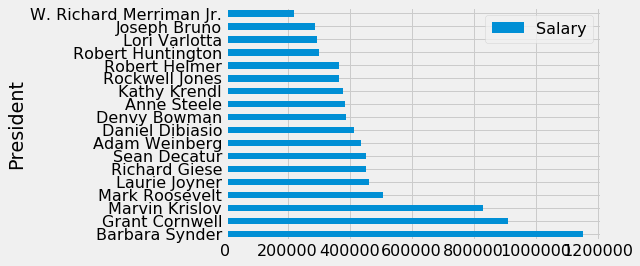

In [69]:
df.plot(kind='barh', x = 'President', y = 'Salary')

In [73]:
# Shorten this one name for plotting
df.ix[df['College'] == 'University of Mount Union', 'College'] = 'Mount Union'

C:\Users\e5553468\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


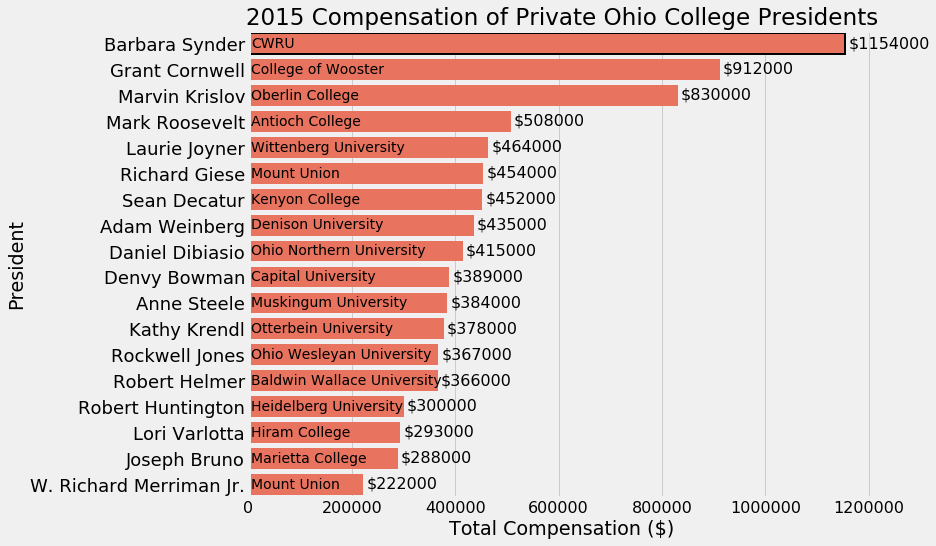

In [75]:
# Create the basic figure
plt.figure(figsize=(10, 8))
sns.barplot(x = 'Salary', y = 'President', data = df, 
            color = 'tomato', edgecolor = 'k', linewidth = 2)

# Add text showing values and colleges
for i, row in df.iterrows():
  plt.text(x = row['Salary'] + 6000, y = i + 0.15, s = '$%d' % (round(row['Salary'] / 1000) * 1000))
  plt.text(x = 5000, y = i + 0.15, s = row['College'], size = 14)

# Labels are a must!
plt.xticks(size = 16); plt.yticks(size = 18)
plt.xlabel('Total Compensation ($)')
plt.ylabel('President') 
plt.title('2015 Compensation of Private Ohio College Presidents');

In [76]:
# Calculate value of 5 minutes of your presidents time
five_minutes_fraction = 5 / (2000 * 60)
total_df = pd.DataFrame(df.groupby('College')['Salary'].sum())
total_df['five_minutes_cost'] = round(total_df['Salary'] * five_minutes_fraction)
total_df = total_df.sort_values('five_minutes_cost', ascending = False).reset_index()

total_df

,College,Salary,five_minutes_cost
0,CWRU,1154000.0,48.0
1,College of Wooster,911651.0,38.0
2,Oberlin College,829913.0,35.0
3,Mount Union,675561.0,28.0
4,Antioch College,507672.0,21.0
5,Kenyon College,451698.0,19.0
6,Wittenberg University,463504.0,19.0
7,Denison University,435322.0,18.0
8,Ohio Northern University,414716.0,17.0
9,Muskingum University,384233.0,16.0


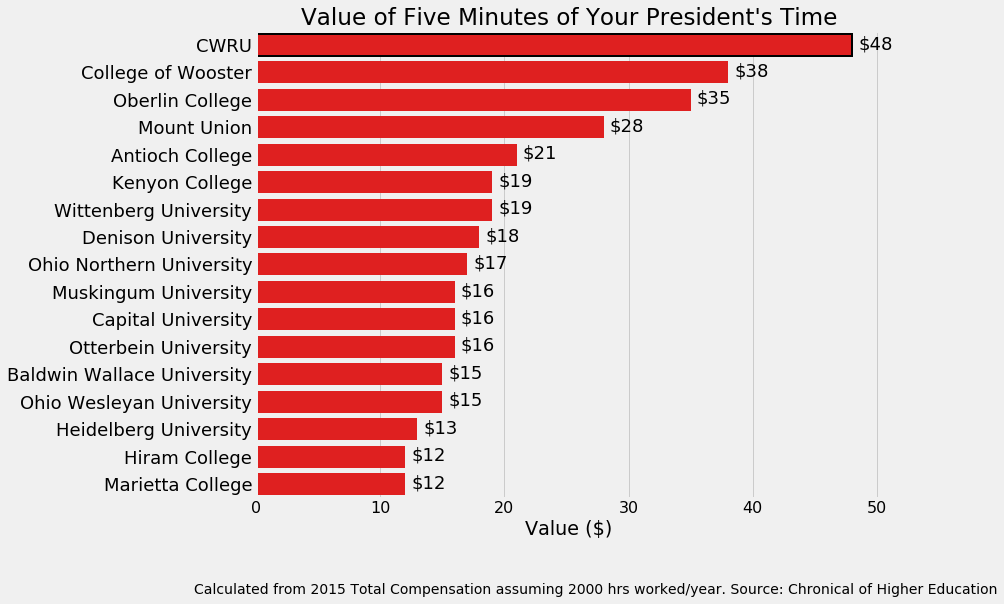

In [77]:
# Text for caption
txt = 'Calculated from 2015 Total Compensation assuming 2000 hrs worked/year. Source: Chronical of Higher Education'

# Create the basic barplot
plt.figure(figsize=(10, 8))
sns.barplot(x = 'five_minutes_cost', y = 'College', data = total_df, 
            color = 'red', edgecolor = 'k', linewidth = 2)

# Add the text with the value
for i, row in total_df.iterrows():
  plt.text(x = row['five_minutes_cost'] + 0.5, y = i + 0.15, 
           s = '$%d' % (row['five_minutes_cost']), size = 18)

# Add the caption
plt.text(x = -5, y = 20, s = txt, size = 14)

# Add the labels
plt.xticks(size = 16); plt.yticks(size = 18)
plt.xlabel('Value ($)')
plt.ylabel('') 
plt.title("Value of Five Minutes of Your President's Time");